# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. 

---
## Step 0: Load The Data

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
from copy import deepcopy
import time
import datetime
from datetime import timedelta
from tensorflow.contrib.layers import flatten
import tensorflow as tf
import random
import scipy.ndimage

In [2]:
# Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


### Question 1: 

Describe how you preprocessed the data. Why did you choose that technique?

#### Answer: 
My dataset preprocessing consist of :
1. Converting images format from RGB to Grayscale - This work well according to the YanLeCun Paper.
2. Normalizing images in the range of float number from 0 to 1 to optimize the speed and avoid training biased.
3. Stardadize image to
4. Reshaped the images shape from (32,32,3) to (32,32,1) then neural network just only have to focus the brightness and not on the color.



### Question 2

Describe how you set up the training, validation and testing data for your model. Optional: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?
    
    1. Training Data   : 67.13% of Whole Data
    2. Validation Data : 8.51% of Whole Data
    3. Test Data       : 24.36% of Whole Data



### Question 3

What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) For reference on how to build a deep neural network using TensorFlow, see Deep Neural Network in TensorFlow from the classroom.

#### Answer:   
My finall network is a modified version of LeNet5 was succesfully for the Mnist Dataset.Layers are described as following.

I have implented the LeNet 5. so I gave it a try for the Traffic Sign Classification. The LeNet 5 consist of 5-Layer, whereby the input Image size is 32x32x1 (grayscale).

    1. 5x5 convolution (32x32x1 in, 28x28x12 out) <-Layer 1
    2. ReLU
    3. 2x2 max pool (28x28x12 in, 14x14x12 out)
    4. 5x5 convolution (14x14x12 in, 10x10x25 out) <-Layer 2
    5. ReLU
    6. 2x2 max pool (10x10x25 in, 5x5x25 out)
    7. Flatten (5x5x25 in, 625 out)
    8. 5x5 convolution (625 in, 120 out) <-Layer 3
    9. ReLU
    10. 5x5 convolution (120 in, 84 out) <-Layer 4
    11. ReLU
    12. Fully connected layer (84 in, 43 out) <-Layer 5


### Question 4

How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)   

#### Answer:  
    
    Model :
    1. Started with Modified version of LeNet5 Architecture
    2. Epoch size : 100
    3. Learning Rate : 0.001
    4. Batch size : 64
    5. Mu = 0
    6. Sigma = 0.01
    7. Optimizer = Adam
    
### Question 5

What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem.
#### Answer:

Starting using LeNet5 Architecture and modified it with some experiments with parameters. I've make observation for my model training, it seem are still learning and don't reach the limits yet. So, I increasing the number of epoch from default as 10 to 20,50,80,100,150,200. Then, I did observe again to see which is the best numbers of epoch. On average the model are stop training when it almost reach around 90 to 105 epochs, so I select the numbers of epoch as 100. 

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

In [3]:
# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# Number of validating examples.
n_valid = len(X_valid)

# The shape of an traffic sign image
image_shape = X_train[0].shape

# Number of unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size #OR len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

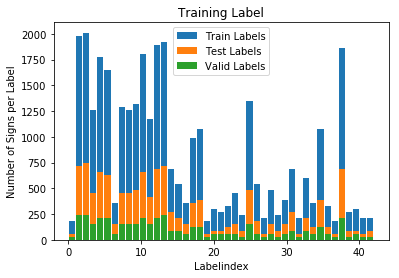

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
hist1, bins = np.histogram(y_test, bins=n_classes)
hist2, bins = np.histogram(y_valid, bins=n_classes)
width =  0.87 * bins[1] - bins[0]
center = (bins[:-1] + bins[1:]) /2
plt.xlabel("Labelindex")
plt.title("Training Label")
plt.ylabel("Number of Signs per Label")
train = plt.bar(center, hist, align='center', width=width)
test = plt.bar(center, hist1, align='center', width=width)
valid = plt.bar(center, hist2, align='center', width=width)
plt.legend((train[0], test[0],valid[0]), ('Train Labels', 'Test Labels','Valid Labels'))
plt.show()

index = random.randint(0, len(X_train))
image = X_train[index]
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### preprocess data and reshape tensor
def preprocess(image):
    img = image[i]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Convert RGB TO Grayscale
    img_shape = img.shape
    img = cv2.normalize(img, img_shape, 0, 255, cv2.NORM_MINMAX)/255 #normalization 0 to 1
    
    # Standardize
    img -= np.mean(img) # zero-center
    img /= np.std(img) # normalize
    return img

train=[]
for i in range(0, n_train):
    pre = preprocess(X_train)
    train.append(pre)

valid=[]
for i in range(0, n_valid):
    pre = preprocess(X_valid)
    valid.append(pre)
    
test=[]
for i in range(0, n_test):
    pre = preprocess(X_test)
    test.append(pre)
    
X_train = np.reshape(train, (np.shape(X_train)[0], 32, 32, 1))
X_valid = np.reshape(valid, (np.shape(X_valid)[0], 32, 32, 1))
X_test  = np.reshape(test, (np.shape(X_test)[0],32, 32, 1))
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [6]:
X_train, y_train = shuffle(X_train, y_train)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.15, random_state=0)

### Model Architecture

<img src="https://goo.gl/cnq51X" alt="LeNet">

In [7]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x25.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 25), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(25))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation 2.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x25. Output = 5x5x25.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x25. Output = 625.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 625. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(625, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation 3.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation 4.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
#Training Pipeline
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y,logits=logits )
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train and Evaluate the Model

In [11]:
#setup of TensorFlow batch size and Epochs for the network training
EPOCHS = 100
BATCH_SIZE = 64

#Train the Model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    start_time = datetime.datetime.now()
    print ("Training start at ", start_time)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        test_accuracy = evaluate(X_test, y_test)
        validation_accuracy = evaluate(X_validation, y_validation)
        #training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        #print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
    
    finished_time = datetime.datetime.now()
    print ("Finished at ", finished_time)
    print("Total training time: ", finished_time - start_time)
    saver.save(sess, './TS_saved')
    print("Model saved")

Training start at  2017-03-27 09:51:12.586270
Training...

EPOCH 1 ...
Test Accuracy = 0.842
Validation Accuracy = 0.932

EPOCH 2 ...
Test Accuracy = 0.880
Validation Accuracy = 0.959

EPOCH 3 ...
Test Accuracy = 0.905
Validation Accuracy = 0.977

EPOCH 4 ...
Test Accuracy = 0.907
Validation Accuracy = 0.979

EPOCH 5 ...
Test Accuracy = 0.915
Validation Accuracy = 0.982

EPOCH 6 ...
Test Accuracy = 0.912
Validation Accuracy = 0.980

EPOCH 7 ...
Test Accuracy = 0.902
Validation Accuracy = 0.973

EPOCH 8 ...
Test Accuracy = 0.907
Validation Accuracy = 0.979

EPOCH 9 ...
Test Accuracy = 0.911
Validation Accuracy = 0.986

EPOCH 10 ...
Test Accuracy = 0.926
Validation Accuracy = 0.988

EPOCH 11 ...
Test Accuracy = 0.896
Validation Accuracy = 0.967

EPOCH 12 ...
Test Accuracy = 0.916
Validation Accuracy = 0.983

EPOCH 13 ...
Test Accuracy = 0.914
Validation Accuracy = 0.986

EPOCH 14 ...
Test Accuracy = 0.923
Validation Accuracy = 0.985

EPOCH 15 ...
Test Accuracy = 0.927
Validation Accuracy

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [12]:
# Read signnames.csv file
df = pd.read_csv('./signnames.csv')
df

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


### Load and Output the Images

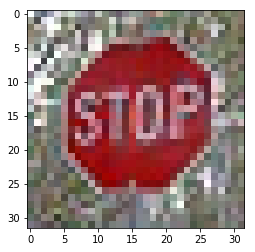

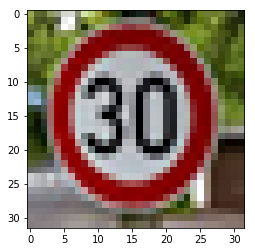

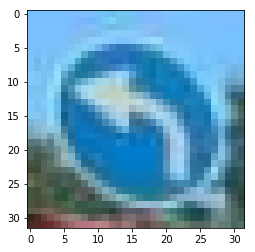

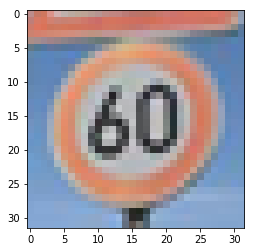

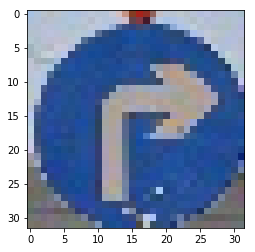

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
my_images = []
img_files = os.listdir('./sign/')
for i in img_files:
    image = './sign/' + i
    img = plt.imread(image)
    img_shape = img.shape
    plt.imshow(img)
    plt.show()
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Convert RGB TO Grayscale
    img = cv2.normalize(img, img_shape, 0, 255, cv2.NORM_MINMAX)/255 #normalization 0 to 1
    
    # Standardize
    img -= np.mean(img) # zero-center
    img /= np.std(img) # normalize
    img = np.reshape(img, (32, 32, 1)) #reshape

    my_images.append(img)  

### Predict the Sign

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

my_labels = [14,1,34,3,33]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./TS_saved.meta')
    saver3.restore(sess, "./TS_saved")
    my_accuracy = evaluate(my_images, my_labels)

    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 1.000


In [15]:
predict=[] 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./TS_saved.meta')
    saver3.restore(sess, "./TS_saved")
    # model evaluation
    prediction = tf.nn.softmax(logits)

    test_prediction = sess.run(tf.nn.top_k(
        prediction,k=5),
        feed_dict={x: my_images })
    predict.append(test_prediction)
    print('Predictions: {}'.format(test_prediction))

Predictions: TopKV2(values=array([[  1.00000000e+00,   5.42460799e-28,   2.02054201e-29,
          4.77536866e-33,   2.98388404e-33],
       [  1.00000000e+00,   2.21408752e-25,   2.75650437e-27,
          1.17582462e-27,   2.13429676e-29],
       [  1.00000000e+00,   9.11462354e-24,   1.28037393e-34,
          1.04085720e-34,   0.00000000e+00],
       [  1.00000000e+00,   8.16808221e-09,   6.13057090e-26,
          1.73016843e-28,   8.87873445e-29],
       [  1.00000000e+00,   4.93644080e-13,   1.79498648e-18,
          8.23831581e-21,   6.44738365e-22]], dtype=float32), indices=array([[14,  3, 34, 26, 18],
       [ 1, 31, 11,  2, 33],
       [34, 38, 13, 36,  0],
       [ 3, 11, 18,  5,  2],
       [33,  5,  1, 40, 11]], dtype=int32))


### Question 6

Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook.

#### Answer:

For better test results, the images are collected from internet as size at 32x32.


### Question 7

Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate.

NOTE: You could check the accuracy manually by using signnames.csv (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in signnames.csv and see if it matches the sign from the image.

#### Answer:

The model predicted the signs perfectly with 100% accurary. It predicted better than 99.4% validation accuracy and the 94.3% test accuracy. This is pretty good on predicting real-world images.


### Question 8

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

#### Answer:
All the images shown above are collected from internet and pit predicted perfectly.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.